In [6]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

In [15]:
from dotenv import load_dotenv; load_dotenv()

True

In [20]:
from datasets import DIV2KDataset

In [21]:
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor()
])


dataset = DIV2KDataset(root=f"{os.getenv("DIV2K_DATA_PATH")}/DIV2K_train_HR", transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [24]:
batch = next(iter(dataloader))
print(batch.shape)

torch.Size([16, 3, 256, 256])


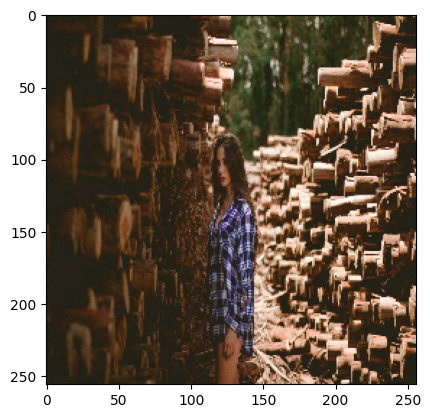

In [25]:
import matplotlib.pyplot as plt

plt.imshow(batch[0].permute(1, 2, 0))
plt.show()